In [ ]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")
from tensorflow import keras

Tensorflow version: 2.8.2
Keras version: 2.8.0


###### Downloading the dataset

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
housing = fetch_california_housing(as_frame=True)

In [ ]:
housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [ ]:
#splitting the dataset into train test and validate
x_train_full, x_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=32)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state=32)

In [ ]:
#scaling the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [ ]:
#implementing early stopping 
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=3)

###### Using Sequential API to build a regression MLP

In [ ]:
x_train.shape[1:]

(8,)

In [ ]:
model1 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=(8,)),#x_train.shape[1:]
    keras.layers.Dense(1)
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


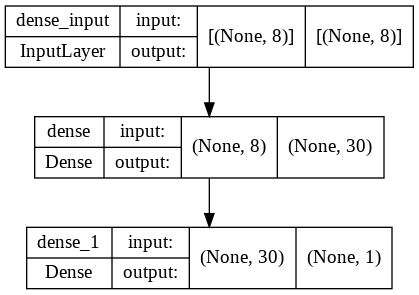

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model1,  show_shapes=True, show_layer_names=True)

In [ ]:
model1.compile(loss="mean_squared_error", optimizer="sgd")
history1 = model1.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid),callbacks=callback)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8259 - val_loss: 0.4875
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4792 - val_loss: 0.4941
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4353 - val_loss: 0.4170
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4617 - val_loss: 0.3992
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4099 - val_loss: 0.3945
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3980 - val_loss: 0.3828
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3920 - val_loss: 0.3870
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3859 - val_loss: 0.3781
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3885 - val_loss: 0.3755
Epoch 10/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3787 - val_loss: 0.3749

In [ ]:
print(model1.evaluate(x_test,y_test))

162/162 [==============================] - 0s 1ms/step - loss: 0.3698
0.3698175251483917


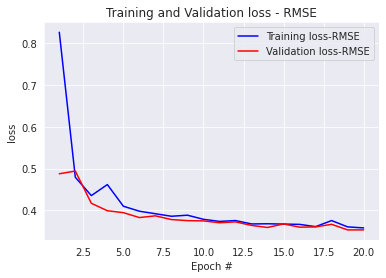

In [ ]:
sns.set_style("darkgrid")

#get the details form the history object which has the training results
#acc = history1.history['accuracy']
#val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(loss) + 1)

#Train and validation loss
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss-RMSE')
plt.plot(epochs, val_loss, 'r', label='Validation loss-RMSE')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss - RMSE')
plt.legend()

plt.show()

###### Wide and Deep Neural Network Using functional API

In [ ]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model2 = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 30)           210         ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           930         ['dense_2[0][0]']                
                                                                                              

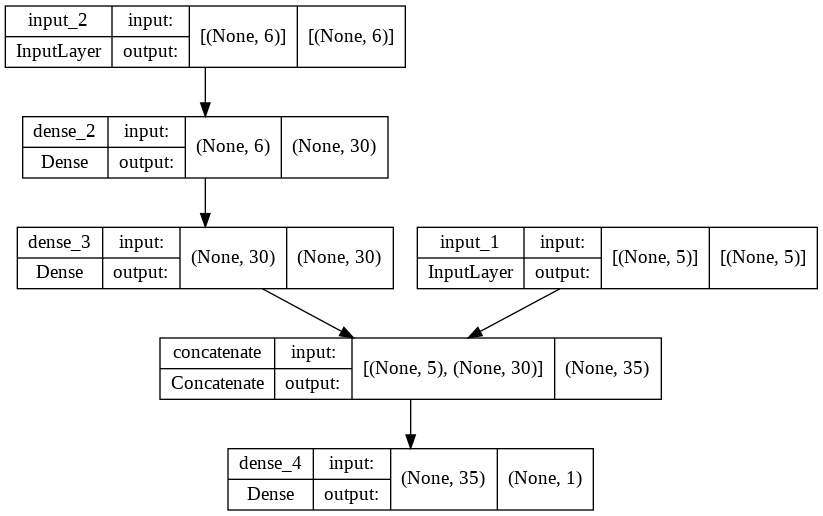

In [ ]:
plot_model(model2,  show_shapes=True, show_layer_names=True)

In [ ]:
model2.compile(loss="mse", optimizer="adam")

In [ ]:
x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_valid_A, x_valid_B = x_valid[:, :5], x_valid[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]

In [ ]:
history2 = model2.fit((x_train_A, x_train_B), y_train, epochs=20,validation_data=((x_valid_A, x_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.6400 - val_loss: 0.5902
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5046 - val_loss: 0.4507
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4270 - val_loss: 0.4096
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3987 - val_loss: 0.3888
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3865 - val_loss: 0.3680
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3659 - val_loss: 0.3604
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3597 - val_loss: 0.3558
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3593 - val_loss: 0.3524
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3780 - val_loss: 0.3484
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3454 - val_loss: 0.3499

In [ ]:
print(model2.evaluate((x_test_A, x_test_B),y_test))

162/162 [==============================] - 0s 2ms/step - loss: 0.3669
0.36690959334373474


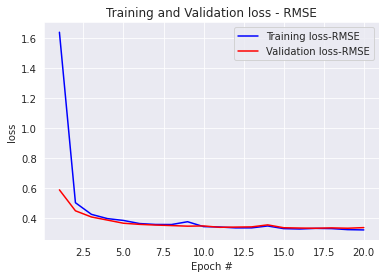

In [ ]:
sns.set_style("darkgrid")

#get the details form the history object which has the training results
#acc = history1.history['accuracy']
#val_acc = history1.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(loss) + 1)

#Train and validation loss
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss-RMSE')
plt.plot(epochs, val_loss, 'r', label='Validation loss-RMSE')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss - RMSE')
plt.legend()

plt.show()

###### Inference

From the two graphs we observe that the training and validation loss both decrease to a point of stability. There is some gap between the training and validation loss curves as well thus both the models generalizes well.